In [1]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *
from stattools.resampling import PermutationTest

In [2]:
#Africa
africa = pd.read_csv('../data/rawcounts_africa.csv').drop(columns=['Name', 'Description'])
africa = africa.T
africa['region'] = 'Africa'

#America
america = pd.read_csv('../data/rawcounts_america.csv').drop(columns=['Name', 'Description'])
america = america.T
america['region'] = 'America'

#Central Asia
centralasia = pd.read_csv('../data/rawcounts_centralasia.csv').drop(columns=['Name', 'Description'])
centralasia = centralasia.T
centralasia['region'] = 'CentralAsia'

#East Asia
eastasia = pd.read_csv('../data/rawcounts_eastasia.csv').drop(columns=['Name', 'Description'])
eastasia = eastasia.T
eastasia['region'] = 'EastAsia'

#SouthAsia
southasia = pd.read_csv('../data/rawcounts_southasia.csv').drop(columns=['Name', 'Description'])
southasia = southasia.T
southasia['region'] = 'SouthAsia'

#Gene anotation
genes = pd.read_csv('../data/rawcounts_africa.csv')
genes = genes.iloc[:,1:2]

In [3]:
genes

,Description
0,DDX11L1
1,WASH7P
2,MIR6859-1
3,MIR1302-2HG
4,MIR1302-2
...,...
58098,ERCC-00164
58099,ERCC-00165
58100,ERCC-00168
58101,ERCC-00170


In [4]:
d= pd.read_csv("vst_574_candidates_gene_anotation.csv")
d.sort_values(by=['chr','start'])

,chr,start,end,genes,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
26,1,9845436,9863387,CLSTN1,NaN,NaN,NaN,NaN,0.26365,NaN,...,NaN,NaN,0.32252,NaN,NaN,NaN,NaN,0.21695,NaN,NaN
3,1,13725296,13733660,PRAMEF20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.23619,0.23093,NaN,0.35185,0.34632,NaN,NaN,NaN,NaN
21,1,62112538,62120128,MGC34796,NaN,NaN,NaN,NaN,0.23412,NaN,...,NaN,NaN,0.39356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1,62620869,62625863,PATJ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.35096,NaN,NaN,NaN,NaN,0.35439,NaN,0.35764
23,1,62642084,62656768,PATJ,NaN,NaN,0.33042,0.44138,0.31196,0.23015,...,0.35576,0.46692,0.34804,0.22823,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,X,134841737,134900920,"CT45A3, CT45A1, CT45A2",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.20514,NaN,0.48622,NaN,NaN,0.57023,NaN,0.20363
245,X,134841737,134975246,"CT45A3, CT45A5, CT45A6, CT45A1, CT45A2",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.26678,NaN,NaN,0.35572,NaN,NaN
246,X,146360192,146369374,"MIR514A1, MIR514A2",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.34919,NaN,NaN
247,X,154788811,154840186,TMLHE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.30299,NaN,NaN,0.24022,0.25329,NaN


In [5]:
d = d.set_index(['genes'])
d

,chr,start,end,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,SouthAsia.Africa,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
genes,,,,,,,,,,,,,,,,,,,,,
SLC25A24,1,108729310,108737787,NaN,NaN,NaN,NaN,NaN,NaN,0.34330,...,NaN,0.28019,0.50669,0.25098,NaN,0.25789,NaN,NaN,NaN,NaN
WDR47,1,109573089,109580939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.21935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"GSTM1, GSTM2, GSTM5",1,110215300,110257943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRAMEF20,1,13725296,13733660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.23619,0.23093,NaN,0.35185,0.34632,NaN,NaN,NaN,NaN
"NBPF20, NA",1,144452805,144456917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMLHE,X,154789310,154826421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.30299,NaN,NaN,0.24022,0.25329,NaN
DMD,X,31529162,31554252,NaN,NaN,NaN,0.33203,NaN,NaN,NaN,...,NaN,0.34625,NaN,NaN,0.30655,NaN,NaN,0.31123,0.31376,NaN
DMD,X,32986310,32990011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.32756,NaN,NaN,NaN,NaN,0.36857,NaN,0.20537


In [6]:
## Merging raw counts
regions = pd.concat([africa,america,centralasia, eastasia,southasia])
#regions = regions.set_index('region')
expr_df = regions
anotation = regions['region']
expr_df = expr_df.drop(columns =['region'])
expr_df = expr_df.T
print(expr_df.shape)

### 

## Filter out non-expressed genes

expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print(expr_df.shape)

## Filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print(expr_df.shape)


expr_df = expr_df.T
expr_df.insert(0, 'region', anotation)
expr_df = pd.DataFrame(expr_df)
expr_df

(58103, 41)
(42453, 41)
(32795, 41)


,region,0,1,9,10,11,12,13,19,21,...,58001,58002,58003,58004,58005,58006,58007,58008,58009,58010
GSM1312724.Mbuti.rnaseqccounts,Africa,0,0,0,0,0,1,0,4,4,...,95274,1,0,0,19567,23477,7,58185,3,3
GSM1312719.Mbuti.rnaseqccounts,Africa,2,63,1,0,0,11,1,39,0,...,313088,0,0,1,106475,63479,2,117999,5,2
GSM1312732.Mozabite.rnaseqccounts,Africa,0,17,0,0,0,0,0,7,2,...,156280,0,0,0,58952,35626,3,68558,1,0
GSM1312722.Mbuti.rnaseqccounts,Africa,0,12,0,0,0,1,0,5,2,...,117133,1,1,0,47325,37962,10,65398,2,2
GSM1312731.Mozabite.rnaseqccounts,Africa,0,7,0,0,4,3,0,4,2,...,169830,1,0,0,44684,41467,6,98357,2,3
GSM1312730.Mozabite.rnaseqccounts,Africa,0,11,4,4,0,0,0,1,3,...,121071,0,0,0,40073,22114,2,60204,1,2
GSM1312725.Mbuti.rnaseqccounts,Africa,0,6,0,0,2,6,2,0,2,...,177779,3,0,0,59778,49825,6,90205,0,0
GSM1312729.Mozabite.rnaseqccounts,Africa,0,42,0,0,0,2,0,43,14,...,297302,2,0,1,85070,53393,5,146046,3,2
GSM1312728.Mozabite.rnaseqccounts,Africa,0,10,2,2,0,1,0,9,2,...,135369,2,0,2,53905,34618,5,53172,1,1
GSM1312723.Mbuti.rnaseqccounts,Africa,0,70,3,0,8,190,63,35,10,...,490641,0,0,0,161058,60918,4,205312,3,3


# Subset the expression DataFrame using top 800 genes with largest variance
### Not running right know

variances = np.var(expr_df, axis=1)
srt_idx = variances.argsort()[::-1]
expr_df_sub = expr_df.iloc[srt_idx].iloc[:800]
print(expr_df_sub.shape)

expr_df_sub = expr_df_sub.T
expr_df_sub.insert(0, 'region', anotation)
expr_df_sub = pd.DataFrame(expr_df_sub)
expr_df_sub


In [7]:
####### Groupby regions #######
dt_group = expr_df.groupby('region')

dt_groupped = []
regions = expr_df['region'].unique()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = expr_df['region'].unique()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])
    


In [8]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4],2))
for pair in combination_regions:
        statistic = vst((dt_groupped[pair[0]]), (dt_groupped[pair[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)
vst_dt = vst_dt.T
vst_dt 

/Users/luciabazan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/luciabazan/GitHub/cnv_sgdp/scripts/vst_function.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vt = pd.concat([x,y]).var()
/Users/luciabazan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(ax

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.071429,0.071429,0.047619,0.047619,NaN,0.142857,0.142857,0.142857,0.142857,0.071429
1,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
9,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
10,0.092262,0.090267,0.051948,0.084997,NaN,0.142857,0.164870,0.142857,0.163335,0.122387
11,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
58006,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
58007,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
58008,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222
58009,0.052859,0.075966,0.047619,0.218911,0.109553,0.076394,0.221332,0.100663,0.095137,0.261710


In [148]:
gene_names = genes.iloc[vst_dt.index]
vst_dt_annotated = vst_dt.set_index(gene_names['Description'])
vst_dt_annotated

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
DDX11L1,0.071429,0.071429,0.047619,0.047619,NaN,0.142857,0.142857,0.142857,0.142857,0.071429
WASH7P,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
AL627309.1,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
AL627309.3,0.092262,0.090267,0.051948,0.084997,NaN,0.142857,0.164870,0.142857,0.163335,0.122387
CICP27,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
MT-ND6,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
MT-TE,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
MT-CYB,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222


In [149]:
vst_dt_annotated.sort_values(by='Africa-America', ascending=False).head(50)

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
AC005726.2,0.781848,0.204614,0.423325,0.048150,0.330337,0.074857,0.762090,0.177045,0.199580,0.379321
NOMO3,0.779114,0.290118,0.353945,0.049084,0.589785,0.271960,0.736243,0.163165,0.269568,0.312722
AC087276.2,0.772659,0.169062,0.499501,0.048083,0.543935,0.073807,0.776289,0.304031,0.175061,0.455722
AL133325.3,0.757216,0.279101,0.236071,0.393642,0.120000,0.359490,0.477992,0.113134,0.116332,0.071773
AC007780.1,0.746703,0.144805,0.445481,0.167599,0.265739,0.084018,0.830892,0.213729,0.245610,0.477120
PHC1P1,0.734999,0.115801,0.182957,0.047619,0.638316,0.333315,0.710586,0.128111,0.159664,0.181230
RF01891,0.718895,0.247742,0.418946,0.093326,0.220123,0.087107,0.677296,0.184679,0.197975,0.349804
AC046130.1,0.691983,0.050013,0.255211,0.158976,0.661425,0.139556,0.327334,0.232166,0.159259,0.099750
AC078777.1,0.691024,0.156592,0.507499,0.051284,0.582216,0.230080,0.655917,0.367647,0.246592,0.484316


<h1> Permutation
    
    results from permutation.py

In [150]:
#permutation_df = pd.DataFrame(p_value_permutation)
permutation_df = pd.read_csv('permutation_rnaseq_vst.csv', index_col=0)
#permutation_df = permutation_df.set_axis(combination_names)
#permutation_df = permutation_df.T
permutation_df = permutation_df.set_axis(vst_dt.index)
permutation_df 

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.7167,0.9521,0.8913,1.0000,0.0001,0.2801,1.0000,1.0000,1.0000,1.0000
1,0.5728,0.4554,0.6868,0.6590,0.6609,0.8631,0.8937,0.6774,0.6374,0.9755
9,0.3706,0.2808,0.6376,0.1332,1.0000,0.6598,0.0138,0.3349,0.0527,0.1997
10,0.6263,0.6072,0.8672,0.4538,0.0001,0.2827,0.0767,1.0000,0.3554,0.4792
11,0.9596,1.0000,0.8715,0.0749,0.9283,0.9152,0.0674,0.8721,0.2031,0.0786
...,...,...,...,...,...,...,...,...,...,...
58006,0.9777,0.6873,0.5738,0.8954,0.7274,0.6315,0.9337,0.4826,0.8031,0.5712
58007,0.8109,0.7405,0.5858,0.4867,0.6639,0.8050,0.3374,0.5720,0.7646,0.4082
58008,0.3740,0.8534,0.9637,0.5708,0.3290,0.3864,0.8566,0.8745,0.5131,0.5979
58009,0.8259,0.5130,0.9765,0.0645,0.5054,0.9162,0.1927,0.7561,0.6655,0.1322


In [151]:
boolean = (permutation_df.T <=0.05)


## Deleting columns where none of the regions passed the imputation
boolean = boolean.loc[:, boolean.any()]
boolean

,0,9,10,22,32,34,35,36,48,50,...,57980,57984,57985,57986,57989,57990,57993,57994,57997,58000
Africa-America,False,False,False,False,True,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,True
Africa-CentralAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa-EastAsia,False,False,False,False,True,False,False,True,False,False,...,True,True,True,False,False,False,False,False,False,True
Africa-SouthAsia,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
America-CentralAsia,True,False,True,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
America-EastAsia,False,False,False,False,False,False,True,False,True,False,...,True,False,True,False,False,False,False,False,False,False
America-SouthAsia,False,True,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
CentralAsia-EastAsia,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
CentralAsia-SouthAsia,False,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,True,False,False,False
EastAsia-SouthAsia,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


<h1> Subsetting by vst > 0.2 and permutation p.value < 0.05

In [152]:
filtering_vst = pd.DataFrame(vst_dt_annotated.T)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
len(filtering_vst.T)
filtering_vst.T

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
AL627309.1,False,False,False,False,False,False,True,True,True,False
CICP27,False,False,False,True,False,False,True,False,True,True
AL627309.6,False,False,False,False,False,False,False,False,True,False
WASH9P,False,False,False,False,False,False,False,False,True,False
AP006222.1,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
MT-TH,False,False,False,False,True,True,False,False,False,True
MT-TS2,False,False,False,False,False,False,False,True,False,False
MT-TL2,False,False,True,False,False,True,False,False,False,True


In [39]:
vst_dt = vst_dt.replace(np.NaN, 0)
vst_dt


,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.071429,0.071429,0.047619,0.047619,0.000000,0.142857,0.142857,0.142857,0.142857,0.071429
1,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
9,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
10,0.092262,0.090267,0.051948,0.084997,0.000000,0.142857,0.164870,0.142857,0.163335,0.122387
11,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
58006,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
58007,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
58008,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222
58009,0.052859,0.075966,0.047619,0.218911,0.109553,0.076394,0.221332,0.100663,0.095137,0.261710


In [153]:
passed_permut = (permutation_df <=0.05)
passed_permut = passed_permut.replace(False, np.NaN)
passed_permut 

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
58006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
passed_permut[passed_permut.notnull()] = vst_dt

In [155]:
passed_permut

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,0.227409,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
58006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
filtering = pd.DataFrame(passed_permut.T)>=0.2
filtering = filtering.loc[:, filtering.any()]
filtering = filtering.T
filtering

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
9,False,False,False,False,False,False,True,False,False,False
32,True,False,True,True,False,False,False,False,False,False
34,False,False,False,False,False,False,True,False,False,False
36,True,False,True,False,True,False,False,False,False,False
48,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
57990,False,False,False,True,False,False,False,False,False,False
57993,False,False,False,True,False,False,True,False,True,True
57994,True,False,False,False,False,False,False,False,False,False
57997,False,False,False,True,False,False,False,False,False,False


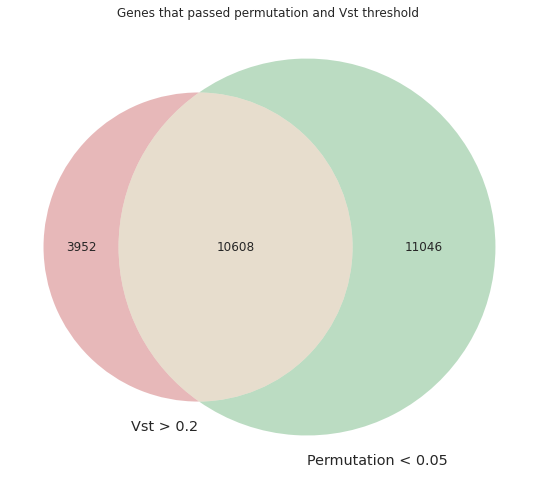

In [157]:
#PERMUTATION RESULTS
inner_per = len(filtering)
left_per = len(boolean.T) - inner_per
right_per = len(filtering_vst.T) -inner_per


venn2(subsets = (left_per, right_per, inner_per), set_labels = ('Vst > 0.2', 'Permutation < 0.05'))
plt.title('Genes that passed permutation and Vst threshold ')
plt.savefig('../plots/venn_diagram_rnaseq.png', transparent=True)

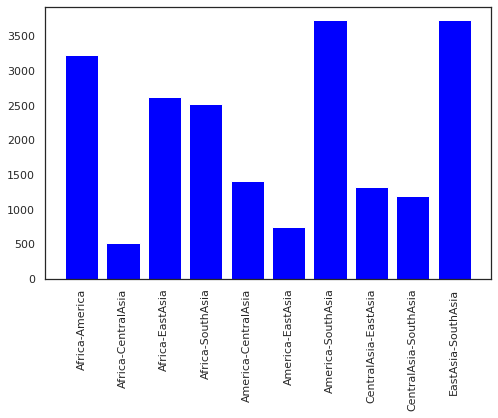

In [158]:
dist = filtering.sum()


fig = plt.figure(figsize = (8, 5))


#fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dist.index, dist, color ='blue')
 
#plt.xlabel("Pairwise combination")
#plt.ylabel("# of CNVs passed perrmutation")
#plt.title("CNVs that passed Vst(pair-group) and permutation", size=20)
plt.xticks(rotation=90)
plt.savefig('../plots/distribution_candidates_vst_rnaseq.png', transparent=True)
plt.show()


In [174]:
candidates = passed_permut.loc[filtering.index]
candidates

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
9,NaN,NaN,NaN,NaN,NaN,NaN,0.227409,NaN,NaN,NaN
32,0.268473,NaN,0.267888,0.268252,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,0.387513,NaN,NaN,NaN
36,0.369943,NaN,0.247175,NaN,0.377968,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,0.334416,NaN,0.450893,0.400526,NaN
...,...,...,...,...,...,...,...,...,...,...
57990,NaN,NaN,NaN,0.251082,NaN,NaN,NaN,NaN,NaN,NaN
57993,NaN,NaN,NaN,0.582665,NaN,NaN,0.425170,NaN,0.614767,0.486977
57994,0.228695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57997,NaN,NaN,NaN,0.207436,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
candidates = genes.merge(candidates, left_index=True, right_index=True)
candidates = candidates.set_index('Description')
candidates

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
AL627309.1,NaN,NaN,NaN,NaN,NaN,NaN,0.227409,NaN,NaN,NaN
MTND1P23,0.268473,NaN,0.267888,0.268252,NaN,NaN,NaN,NaN,NaN,NaN
MTCO1P12,NaN,NaN,NaN,NaN,NaN,NaN,0.387513,NaN,NaN,NaN
MTCO2P12,0.369943,NaN,0.247175,NaN,0.377968,NaN,NaN,NaN,NaN,NaN
AL669831.4,NaN,NaN,NaN,NaN,NaN,0.334416,NaN,0.450893,0.400526,NaN
...,...,...,...,...,...,...,...,...,...,...
MT-TS1,NaN,NaN,NaN,0.251082,NaN,NaN,NaN,NaN,NaN,NaN
MT-TK,NaN,NaN,NaN,0.582665,NaN,NaN,0.425170,NaN,0.614767,0.486977
MT-ATP8,0.228695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
overlaping = candidates.merge(d, left_index=True, right_index=True)
overlaping.sort_values(by=['Africa-America']).head()
overlaping_mean = overlaping.mean()
overlaping_mean#[['Africa-America']]

Africa-America                    3.007936e-01
Africa-CentralAsia                3.225014e-01
Africa-EastAsia                   2.693735e-01
Africa-SouthAsia                  3.157705e-01
America-CentralAsia               3.851599e-01
America-EastAsia                  3.716474e-01
America-SouthAsia                 4.476963e-01
CentralAsia-EastAsia              3.910298e-01
CentralAsia-SouthAsia             4.044445e-01
EastAsia-SouthAsia                4.003042e-01
start                             8.939658e+07
end                               8.940796e+07
WestEurasia.SouthAsia             2.427300e-01
WestEurasia.Africa                2.983928e-01
WestEurasia.CentralAsiaSiberia    2.531000e-01
WestEurasia.Oceania               2.763019e-01
WestEurasia.America               2.674467e-01
WestEurasia.EastAsia              2.707554e-01
SouthAsia.Africa                  2.893339e-01
SouthAsia.CentralAsiaSiberia      2.580925e-01
SouthAsia.Oceania                 2.697492e-01
SouthAsia.Ame

In [177]:
sns.heatmap(overlaping)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [193]:
import scipy


scipy.stats.spearmanr(overlaping[['Africa-America']], overlaping[['Africa.America']], nan_policy='omit').correlation
#scipy.stats.spearmanr(overlaping[['Africa-America']], overlaping[['Africa.America']], nan_policy='omit').pvalue

0.5192522394030581

In [192]:
import scipy


overlaping.corr()


,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
Africa-America,1.000000,-0.549864,0.506457,-0.044983,-0.101167,NaN,0.013541,-1.000000,-0.121922,0.428924,...,0.068836,0.505189,0.544295,-0.050011,0.653510,0.639683,NaN,0.158276,-1.000000,1.000000
Africa-CentralAsia,-0.549864,1.000000,-1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.823562,0.076162,-1.000000,NaN,NaN,NaN,-1.000000,NaN,NaN
Africa-EastAsia,0.506457,-1.000000,1.000000,-0.379230,-1.000000,1.000000,0.497351,0.677870,1.000000,0.975763,...,0.513228,0.350471,0.516003,NaN,0.727131,0.995397,NaN,0.608479,0.067725,-0.224507
Africa-SouthAsia,-0.044983,1.000000,-0.379230,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,-0.060966,NaN,-0.116624,-0.087474,-0.495441,-0.303042,NaN,-0.473981,NaN,0.982797
America-CentralAsia,-0.101167,NaN,-1.000000,NaN,1.000000,NaN,0.687751,0.267044,NaN,0.411172,...,1.000000,0.360529,-0.506299,NaN,0.351698,NaN,NaN,-0.119580,0.737631,0.992009
America-EastAsia,NaN,NaN,1.000000,NaN,NaN,1.000000,0.654119,1.000000,NaN,NaN,...,1.000000,1.000000,0.781056,NaN,NaN,NaN,NaN,-1.000000,NaN,1.000000
America-SouthAsia,0.013541,NaN,0.497351,1.000000,0.687751,0.654119,1.000000,0.043070,-0.011818,0.583137,...,-0.188908,-0.557874,-0.184529,-0.379325,0.956090,-0.858071,NaN,0.117885,0.474728,-1.000000
CentralAsia-EastAsia,-1.000000,NaN,0.677870,NaN,0.267044,1.000000,0.043070,1.000000,NaN,0.760885,...,0.628458,-0.541137,-0.118405,-0.027197,-0.197396,-0.891549,NaN,-0.319362,-0.911123,0.486162
CentralAsia-SouthAsia,-0.121922,NaN,1.000000,NaN,NaN,NaN,-0.011818,NaN,1.000000,0.546541,...,-0.319218,0.666731,-0.388154,0.109856,0.698304,NaN,NaN,0.404331,0.965095,NaN
EastAsia-SouthAsia,0.428924,NaN,0.975763,NaN,0.411172,NaN,0.583137,0.760885,0.546541,1.000000,...,-0.737566,0.330709,-0.288218,0.028236,0.680340,-0.144852,-1.0,-0.046250,0.058147,0.968497


Text(0, 0.5, 'CNV Vst')

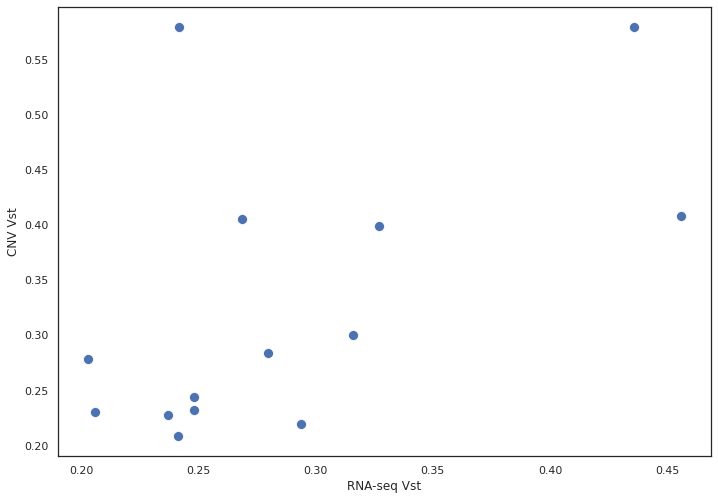

In [189]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style("white")

g=sns.scatterplot(x="Africa-America", y="Africa.America", s=100,
              data=overlaping,
              legend="brief");

plt.xlabel('RNA-seq Vst')
plt.ylabel('CNV Vst')
plt.title('cor = 0.599, p=0.057', size=15)
plt.suptitle('Correlation between Vst values from RNA-seq and CNV of Africa-America', size=20)
plt.savefig('../plots/cnv_vs_rnaseq_vstvalues_africa-america.png', transparent=True)


In [181]:
#means_groupping
cnv_mean = pd.DataFrame(overlaping_mean[18:33])
cnv_mean = cnv_mean.drop('SouthAsia.Oceania')
cnv_mean = cnv_mean.drop('Africa.Oceania')
cnv_mean = cnv_mean.drop('CentralAsiaSiberia.Oceania')
cnv_mean = cnv_mean.drop('Oceania.America')
cnv_mean = cnv_mean.drop('Oceania.EastAsia')

cnv_mean = cnv_mean.rename(index={
    'Africa.America': "Africa-America",
    'Africa.CentralAsiaSiberia': "Africa-CentralAsia",
    'Africa.EastAsia': "Africa-EastAsia",
    'America.EastAsia': "America-EastAsia",
    'CentralAsiaSiberia.EastAsia': "CentralAsia-EastAsia",
    'CentralAsiaSiberia.America': "America-CentralAsia", 
    'SouthAsia.Africa': "Africa-SouthAsia", 
    'SouthAsia.America': "America-SouthAsia",
    'SouthAsia.CentralAsiaSiberia': "CentralAsia-SouthAsia",
    'SouthAsia.EastAsia': "EastAsia-SouthAsia"

})
cnv_mean.sort_index()

,0
Africa-America,0.299314
Africa-CentralAsia,0.300856
Africa-EastAsia,0.314410
Africa-SouthAsia,0.289334
America-CentralAsia,0.293664
America-EastAsia,0.263077
America-SouthAsia,0.274999
CentralAsia-EastAsia,0.233200
CentralAsia-SouthAsia,0.258093
EastAsia-SouthAsia,0.249953


In [182]:
#means_groupping
rnaseq_mean = pd.DataFrame(overlaping_mean[0:10])


In [183]:
means = rnaseq_mean.merge(cnv_mean, left_index=True, right_index=True)
means = means.reset_index()
means = means.rename(columns={'index':'group','0_x':'rnaseq', '0_y':'cnv'})
means

,group,rnaseq,cnv
0,Africa-America,0.300794,0.299314
1,Africa-CentralAsia,0.322501,0.300856
2,Africa-EastAsia,0.269374,0.314410
3,Africa-SouthAsia,0.315770,0.289334
4,America-CentralAsia,0.385160,0.293664
5,America-EastAsia,0.371647,0.263077
6,America-SouthAsia,0.447696,0.274999
7,CentralAsia-EastAsia,0.391030,0.233200
8,CentralAsia-SouthAsia,0.404444,0.258093
9,EastAsia-SouthAsia,0.400304,0.249953


In [186]:
scipy.stats.spearmanr(means['rnaseq'], means['cnv']).correlation 
#scipy.stats.spearmanr(means['rnaseq'], means['cnv']).pvalue

-0.7333333333333332

In [185]:
scipy.stats.pearsonr(means['rnaseq'], means['cnv'])
#scipy.stats.pearsonr(means['rnaseq'], means['cnv']).pvalue

(-0.7155781672216088, 0.019969761865153014)

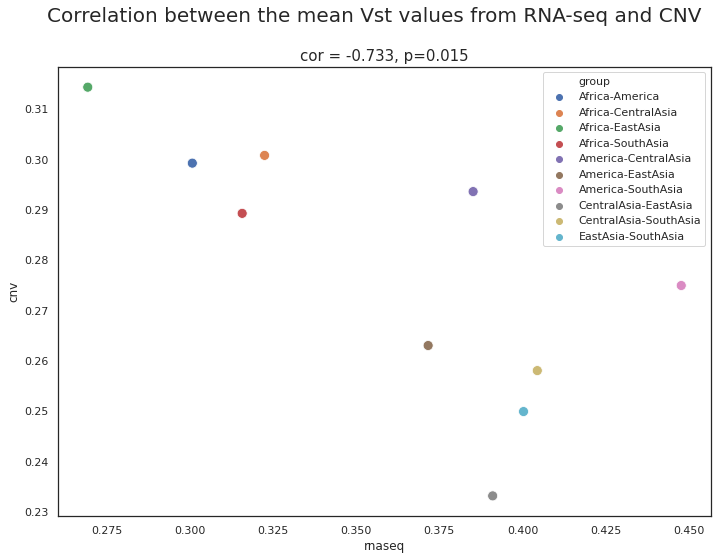

In [187]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style("white")

g=sns.scatterplot(x="rnaseq", y="cnv", s=100,
              hue="group",
              data=means,
              legend="brief");

plt.title('cor = -0.733, p=0.015', size=15)
plt.suptitle('Correlation between the mean Vst values from RNA-seq and CNV', size=20)
plt.savefig('../plots/cnv_vs_rnaseq_vstvalues.png', transparent=True)

#g.set(xscale="log");